In [1]:
!pip install expectexception

In [2]:
import expectexception

# Problem Statement - CardioGood Fitness Data Analysis-2

## Context

The market research team at AdRight is assigned the task to identify the profile of the typical customer for each treadmill product offered by CardioGood Fitness. The market research team decides to investigate whether there are differences across the product lines with respect to customer characteristics. The team decides to collect data on individuals who purchased a treadmill at a CardioGood Fitness retail store at any time in the past three months. The data is stored in the CardioGoodFitness.csv file.

## Objective
Perform descriptive analysis to create a customer profile for each CardioGood Fitness treadmill product line.

## Data Dictionary

The team identified the following customer variables to study:

- **Product**: Product purchased - TM195, TM498, or TM798
- **Gender**: Male or Female
- **Age**: Age of the customer in years
- **Education**: Education of the customer in years
- **MaritalStatus**: Single or partnered
- **Income**: Annual household income
- **Usage**: The average number of times the customer plans to use the treadmill each week;
- **Miles**: The average number of miles the customer expects to walk/run each week;
- **Fitness**: Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is excellent shape.

## Questions to explore

- What are the different types of variables in the data?
- What is the distribution of different variables in the data?
- Which product is more popular among males or females?
- Is the product purchase affected by the marital status of the customer?
- Is there a significant correlation among some of the variables?
- What is the distribution of the average number of miles for each product?

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# plot_param     = {'axes.labelsize': 10, 'xtick.labelsize': 10, 'ytick.labelsize': 10, 
#                   'legend.fontsize': 10, 'font.size': 10}
# plt.rcParams.update(**plot_param)
# plt.style.use('default')

In [65]:
!dir *.*

 Volume in drive C is OS
 Volume Serial Number is E055-4D73

 Directory of C:\Users\jaces\Documents\projects\MIT - DataScience\Foundations for Data Science

05/28/2023  01:57 PM    <DIR>          .
05/28/2023  08:37 AM    <DIR>          ..
05/28/2023  11:58 AM    <DIR>          .ipynb_checkpoints
05/28/2023  11:46 AM    <DIR>          Data
05/28/2023  11:46 AM            32,989 Notebook 01 - Numpy.ipynb
05/28/2023  11:50 AM           154,827 Notebook 02 - Pandas.ipynb
05/28/2023  11:53 AM           166,818 Notebook 03 - Pandas.ipynb
05/28/2023  11:54 AM         1,027,019 Notebook 04 - Visualization.ipynb
05/28/2023  01:57 PM         1,680,322 Notebook 05 - Exercise - Cardio Good Fitness.ipynb
05/28/2023  11:58 AM           610,581 Notebook 05 - Solution - Cardio Good Fitness .ipynb
05/28/2023  12:00 PM           343,419 Notebook 06 - Exercise - FIFA World Cup (First Try).ipynb
05/28/2023  12:09 PM           703,723 Notebook 06 - Exercise - FIFA World Cup (Second Try).ipynb
05/28/2023  

In [6]:
df = pd.read_csv('data/CardioGoodFitness.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [8]:
df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


## What are the different types of variables in the data?

In [9]:
# Also in class
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [10]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

## What is the distribution of different variables in the data?

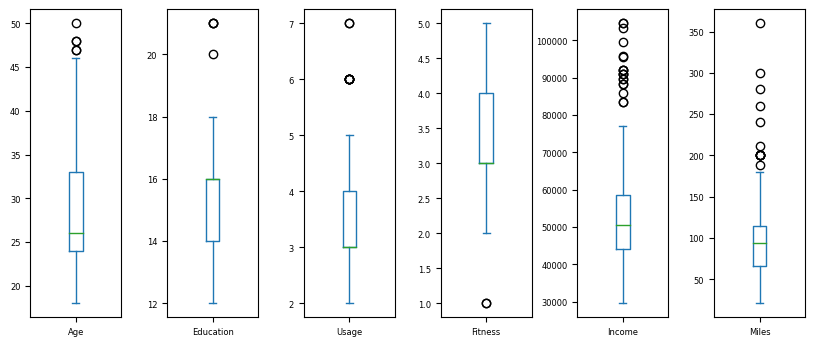

In [11]:
df.plot(kind='box', subplots=True, sharey=False, fontsize=6, figsize=(10, 4))
plt.subplots_adjust(wspace=0.5) 
plt.show()

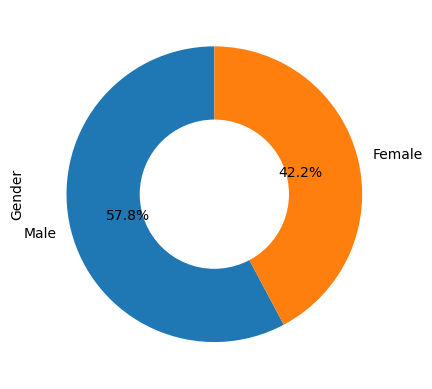

In [12]:
df.Gender.value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
circle =  plt.Circle( (0,0), 0.5, color='white')
plot = plt.gcf()
plot.gca().add_artist(circle)
plt.show()

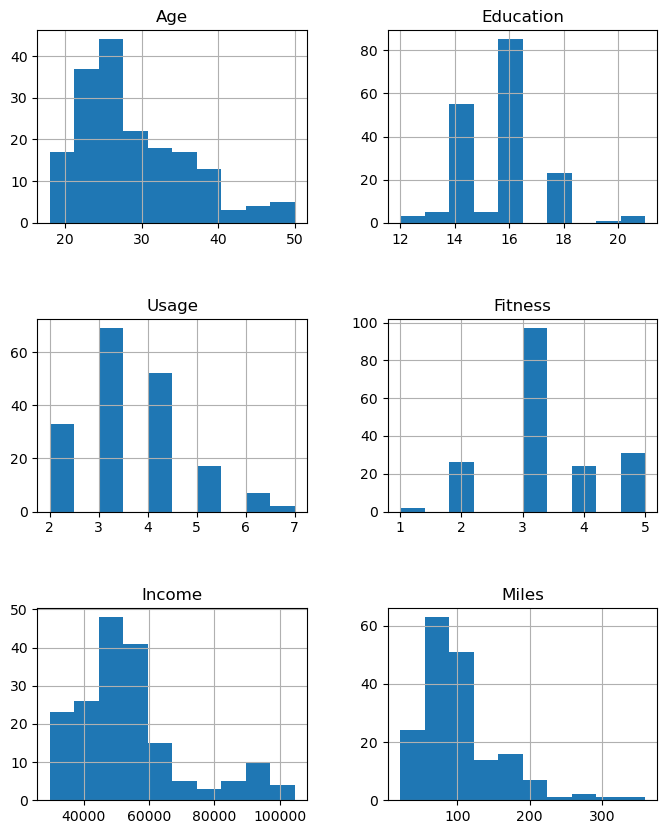

In [13]:
# Also in class
df.hist(figsize=(8, 10))
plt.subplots_adjust(hspace=0.5) 
plt.show()

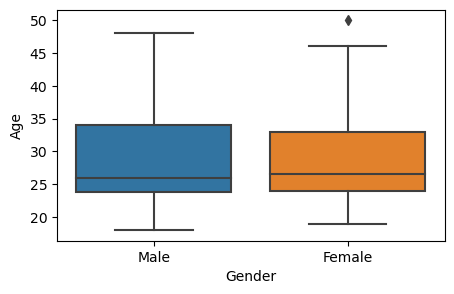

In [14]:
# From class
plt.figure(figsize = (5, 3))
sns.boxplot(x='Gender', y='Age', data=df)
plt.show()

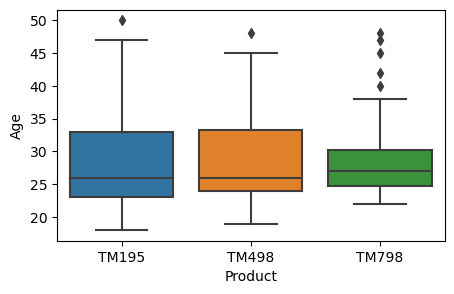

In [15]:
# From class
plt.figure(figsize = (5, 3))
sns.boxplot(x='Product', y='Age', data=df)
plt.show()

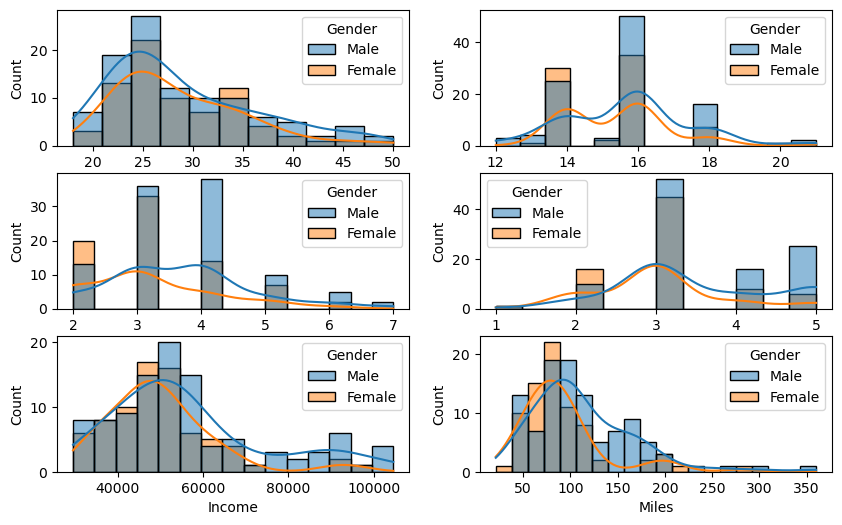

In [16]:
fig, axs = plt.subplots(3, 2, figsize=(10, 6))
cols = df.select_dtypes(include=np.number).columns
for i, ax in enumerate(axs.flatten()):
    sns.histplot(data=df, x=cols[i], kde=True, ax=ax, hue='Gender')
plt.show()

In [17]:
df_melt = df.select_dtypes(include=np.number).melt()
print(df_melt.head())
df_gender_melt = df.melt(id_vars=['Gender'], value_vars=df.select_dtypes(include=np.number).columns)
print(df_gender_melt.head())

  variable  value
0      Age     18
1      Age     19
2      Age     19
3      Age     19
4      Age     20
   Gender variable  value
0    Male      Age     18
1    Male      Age     19
2  Female      Age     19
3    Male      Age     19
4    Male      Age     20


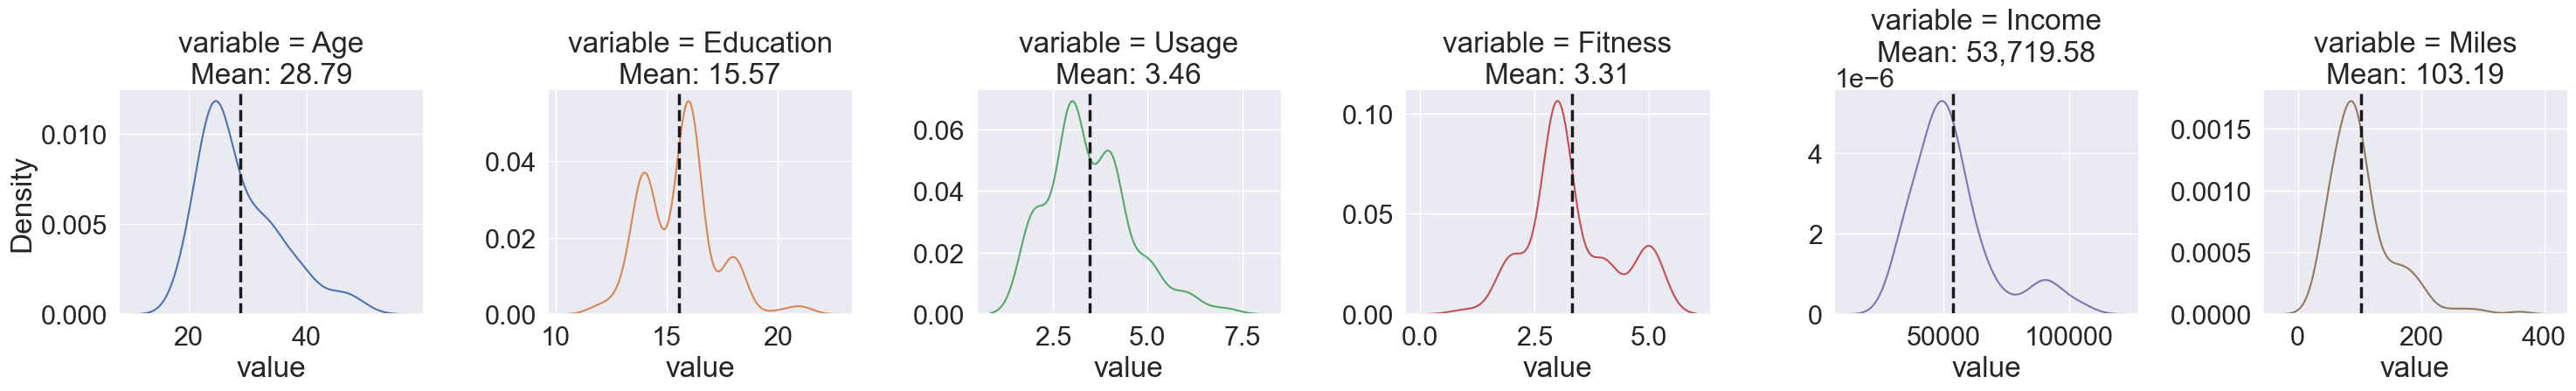

In [18]:
def central_tendency(x, **kwargs):
    ax = plt.gca()
    mean = x.mean()
    ax.axvline(mean, c='k', ls='--', lw=2.5)
    ax.set_title('{}\nMean: {:,.2f}'.format(ax.get_title(), mean))
    # ax.annotate("Mean {:,.4f}".format(mean),
    #             xy=(.1, .9), xycoords=ax.transAxes)
    
sns.set(font_scale=2) 
g = sns.displot(data=df_melt, x="value", hue="variable", col="variable", legend=False, 
            kind="kde", facet_kws={'sharex': False, 'sharey': False})
g.map(central_tendency, 'value')
plt.show()
sns.set()

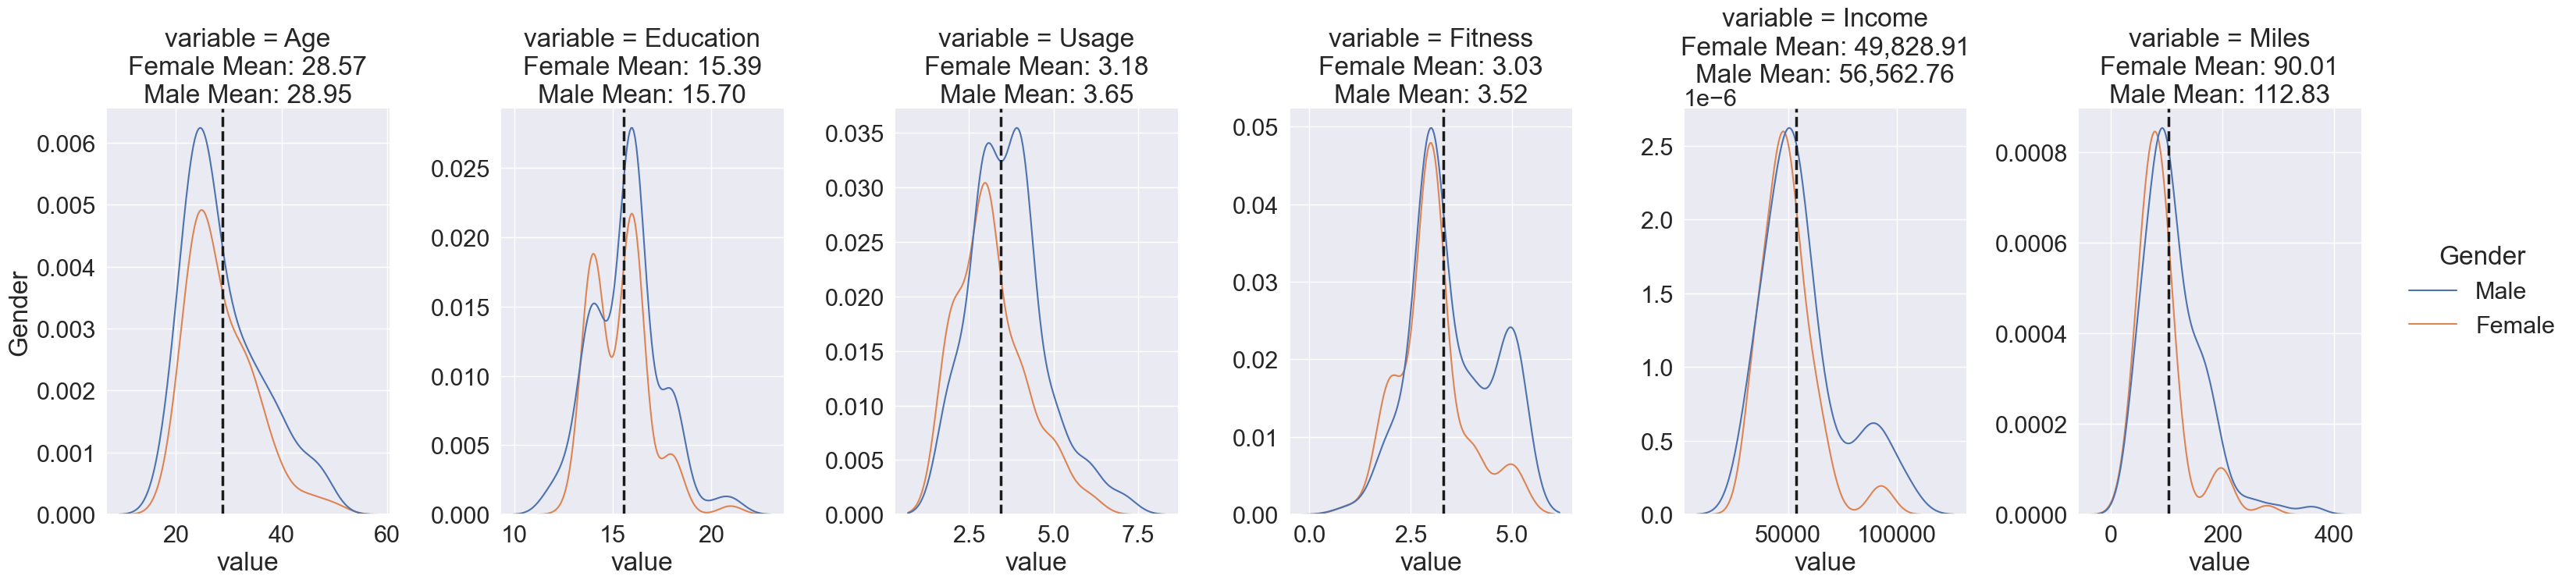

In [19]:
def central_tendency(x, y, **kwargs):
    ax = plt.gca()
    mean = x.mean()
    ax.axvline(mean, c='k', ls='--', lw=2.5)
    ax.set_title('{}\nFemale Mean: {:,.2f}\nMale Mean: {:,.2f}'.format(
        ax.get_title(), x[y=='Female'].mean(), x[y=='Male'].mean()
    ))
    
sns.set(font_scale=2) 
g = sns.displot(data=df_gender_melt, x="value", col="variable", hue='Gender', height=8, aspect=.65, 
                kind="kde", facet_kws={'sharex': False, 'sharey': False})
g.map(central_tendency, 'value', 'Gender')
plt.show()
sns.set()

## Which product is more popular among males or females?

In [20]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [21]:
# From class
# When we have 2 categorical variable
pd.crosstab(df.Product, df.Gender)

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


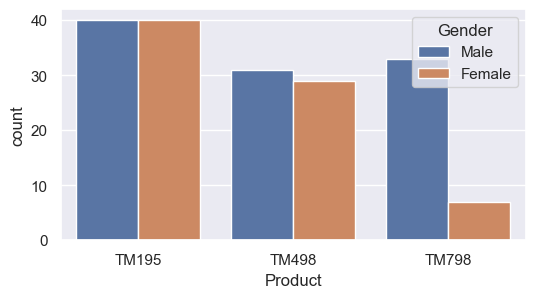

In [22]:
# From class
plt.figure(figsize = (6, 3))
sns.countplot(x='Product', hue='Gender', data=df)
plt.show()

In [23]:
df_usage_by_gender = df[['Gender','Product', 'Usage']].value_counts().to_frame("Count").reset_index()
df_usage_by_gender['Consume'] = df_usage_by_gender.Usage * df_usage_by_gender.Count
df_usage_by_gender.head()

,Gender,Product,Usage,Count,Consume
0,Female,TM195,3,19,57
1,Male,TM195,3,18,54
2,Male,TM498,3,17,51
3,Male,TM798,4,16,64
4,Male,TM195,4,15,60


In [24]:
df_usage_by_gender = df_usage_by_gender.groupby(['Gender','Product'])['Consume'].sum().to_frame().reset_index()
df_usage_by_gender

,Gender,Product,Consume
0,Female,TM195,116
1,Female,TM498,91
2,Female,TM798,35
3,Male,TM195,131
4,Male,TM498,93
5,Male,TM798,156


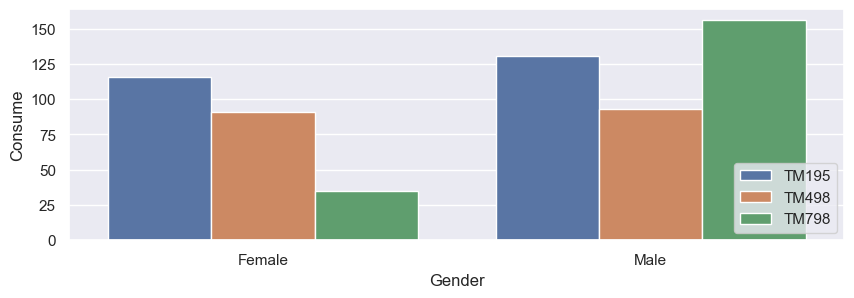

In [25]:
plt.figure(figsize = (10, 3))
sns.barplot(data=df_usage_by_gender, x='Gender', y='Consume', hue='Product')
plt.legend(loc = 'lower right')
plt.show()

In [26]:
df_usage_by_gender = df_usage_by_gender.pivot(index='Gender', columns='Product', values='Consume')
df_usage_by_gender

Product,TM195,TM498,TM798
Gender,,,
Female,116,91,35
Male,131,93,156


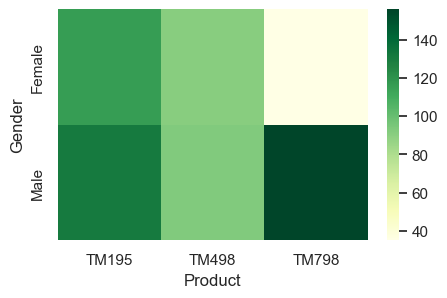

In [27]:
plt.figure(figsize = (5, 3))
sns.heatmap(df_usage_by_gender, cmap='YlGn')
plt.show()

## Is the product purchase affected by the marital status of the customer?

In [28]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [29]:
# From class
# When we have 2 categorical variable
pd.crosstab(df.Product, df.MaritalStatus)

MaritalStatus,Partnered,Single
Product,,
TM195,48,32
TM498,36,24
TM798,23,17


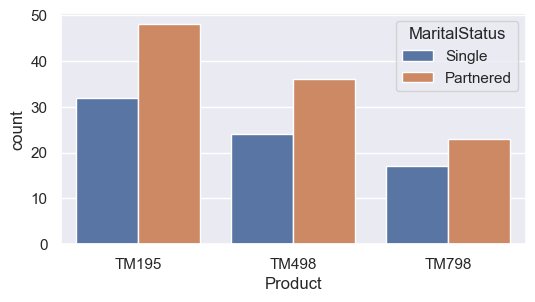

In [30]:
# From class
plt.figure(figsize = (6, 3))
sns.countplot(x='Product', hue='MaritalStatus', data=df)
plt.show()

In [31]:
# From class
pd.pivot_table(df, index=['Product', 'Gender'],
               columns=['MaritalStatus'], aggfunc=len)

Age        Education          Fitness           Income  \
MaritalStatus  Partnered Single Partnered Single Partnered Single Partnered   
Product Gender                                                                
TM195   Female        27     13        27     13        27     13        27   
        Male          21     19        21     19        21     19        21   
TM498   Female        15     14        15     14        15     14        15   
        Male          21     10        21     10        21     10        21   
TM798   Female         4      3         4      3         4      3         4   
        Male          19     14        19     14        19     14        19   

                          Miles            Usage         
MaritalStatus  Single Partnered Single Partnered Single  
Product Gender                                           
TM195   Female     13        27     13        27     13  
        Male       19        21     19        21     19  
TM498   Female     14        15     14        15     14  
        Male       10        21     10        21     10  
TM798   Female      3         4      3         4      3  
        Male       14        19     14        19     14

In [32]:
# From class
# This allow us to compare 3 variables: Product, Gender, MaritalStatus
pd.pivot_table(df, 'Usage', index=['Product', 'Gender'],
               columns=['MaritalStatus'], aggfunc=len)

MaritalStatus   Partnered  Single
Product Gender                   
TM195   Female         27      13
        Male           21      19
TM498   Female         15      14
        Male           21      10
TM798   Female          4       3
        Male           19      14

In [33]:
df_usage_by_ms = df[['Gender', 'MaritalStatus', 'Product', 'Usage']].value_counts().to_frame("Count").reset_index()
df_usage_by_ms['Consume'] = df_usage_by_ms.Usage * df_usage_by_ms.Count
df_usage_by_ms = df_usage_by_ms.groupby(['Gender','MaritalStatus','Product'])['Consume'].sum().to_frame().reset_index()
df_usage_by_ms

,Gender,MaritalStatus,Product,Consume
0,Female,Partnered,TM195,77
1,Female,Partnered,TM498,50
2,Female,Partnered,TM798,21
3,Female,Single,TM195,39
4,Female,Single,TM498,41
5,Female,Single,TM798,14
6,Male,Partnered,TM195,69
7,Male,Partnered,TM498,60
8,Male,Partnered,TM798,92
9,Male,Single,TM195,62


In [34]:
df_usage_by_ms = df[['MaritalStatus', 'Product', 'Usage']].value_counts().to_frame("Count").reset_index()
df_usage_by_ms['Consume'] = df_usage_by_ms.Usage * df_usage_by_ms.Count
df_usage_by_ms = df_usage_by_ms.groupby(['MaritalStatus','Product'])['Consume'].sum().to_frame().reset_index()
df_usage_by_ms

,MaritalStatus,Product,Consume
0,Partnered,TM195,146
1,Partnered,TM498,110
2,Partnered,TM798,113
3,Single,TM195,101
4,Single,TM498,74
5,Single,TM798,78


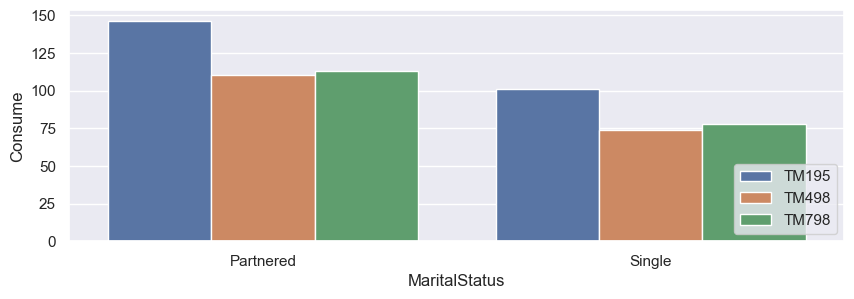

In [35]:
plt.figure(figsize = (10, 3))
sns.barplot(data=df_usage_by_ms, x='MaritalStatus', y='Consume', hue='Product')
plt.legend(loc = 'lower right')
plt.show()

In [36]:
df_usage_by_ms = df_usage_by_ms.pivot(index='MaritalStatus', columns='Product', values='Consume')
df_usage_by_ms

Product,TM195,TM498,TM798
MaritalStatus,,,
Partnered,146,110,113
Single,101,74,78


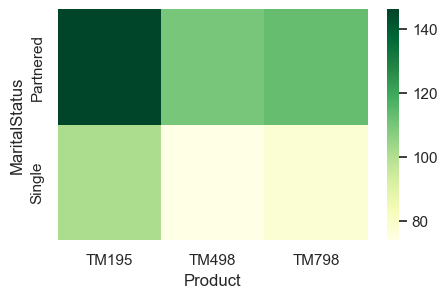

In [37]:
plt.figure(figsize = (5, 3))
sns.heatmap(df_usage_by_ms, cmap='YlGn')
plt.show()

## Is there a significant correlation among some of the variables?

In [38]:
# From class
pd.pivot_table(df, 'Income', index=['Product', 'Gender'],
               columns=['MaritalStatus'], aggfunc='mean')

MaritalStatus      Partnered        Single
Product Gender                            
TM195   Female  46153.777778  45742.384615
        Male    50028.000000  43265.842105
TM498   Female  49724.800000  48920.357143
        Male    49378.285714  47071.800000
TM798   Female  84972.250000  58516.000000
        Male    81431.368421  68216.428571

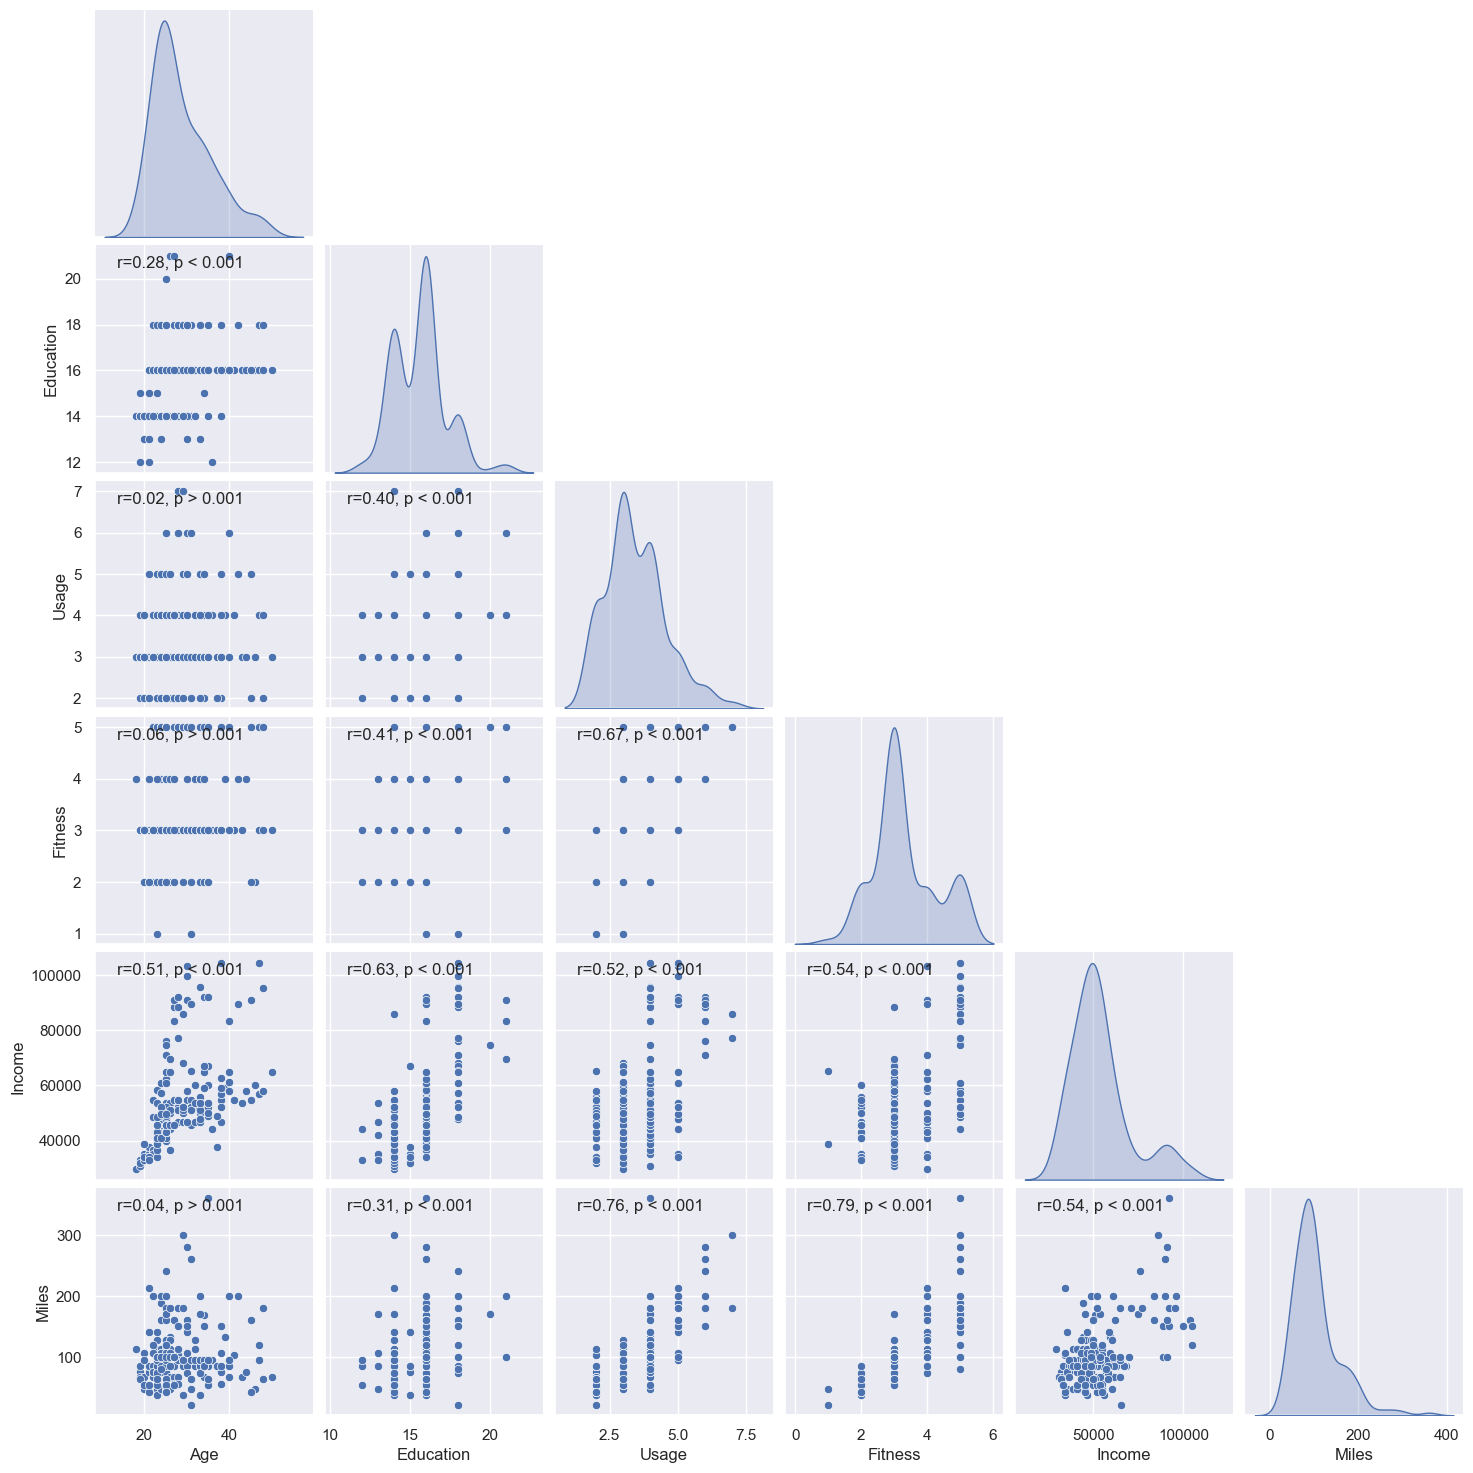

In [39]:
# In class
# sns.pairplot(df)
from scipy.stats import pearsonr

def corrfunc(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    # ax.annotate("r={:.2f}, p={:.6f}".format(r, p), xy=(.1, .9), xycoords=ax.transAxes)
    ax.annotate("r={:.2f}, {}".format(r, 'p < 0.001' if p<=0.001 else 'p > 0.001'), xy=(.1, .9), xycoords=ax.transAxes)
    
sns.set(font_scale=1) 
graph = sns.pairplot(data=df, diag_kind="kde", corner=True)
graph.map_lower(corrfunc)
plt.show()
sns.set() 

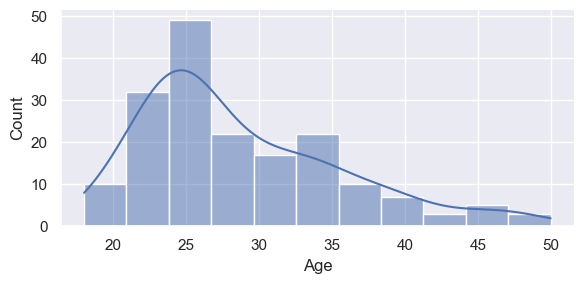

In [40]:
# From class
# plt.style.use('default')
sns.set()
sns.displot(data=df.Age, kde=True, height=3, aspect=2)
plt.show()

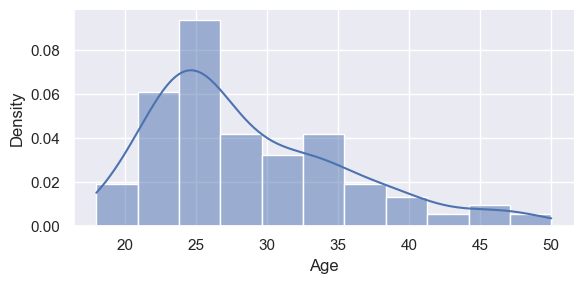

In [41]:
# From class
# plt.style.use('default')
sns.set()
sns.displot(data=df.Age, kde=True, stat='density', height=3, aspect=2)
plt.show()

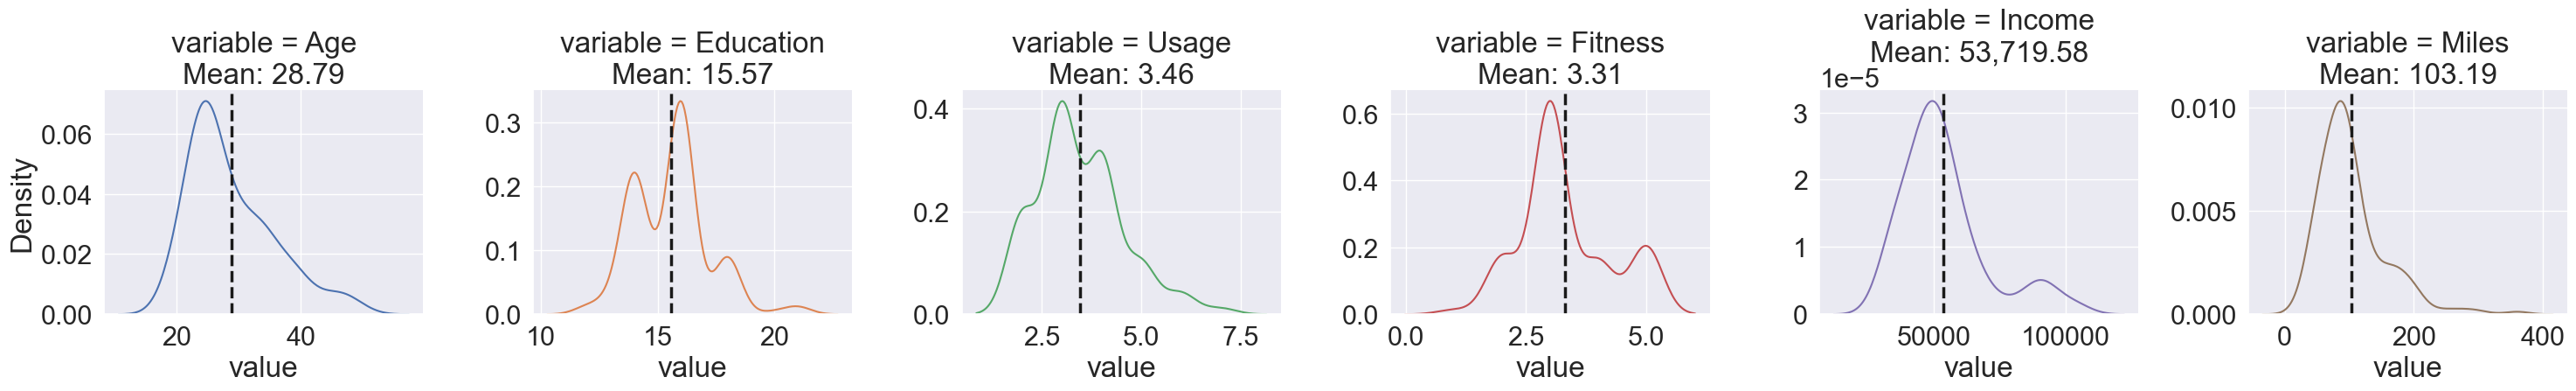

In [42]:
# seaborn histplot and displot output doesn't match
# https://stackoverflow.com/questions/68865538/seaborn-histplot-and-displot-output-doesnt-match
# - common_bins=False gets the histograms into the same shape, resolving the issues of ignoring 
#   bins and sharex, and the density in a faceted plot is scaled by the number of data points in 
#   each facet, not the number of facets.
# - The issue with density being split by the number of plots in displot is resolved by using 
#   common_norm=False

def central_tendency(x, **kwargs):
    ax = plt.gca()
    mean = x.mean()
    ax.axvline(mean, c='k', ls='--', lw=2.5)
    ax.set_title('{}\nMean: {:,.2f}'.format(ax.get_title(), mean))
    # ax.annotate("Mean {:,.4f}".format(mean),
    #             xy=(.1, .9), xycoords=ax.transAxes)
    
sns.set(font_scale=2) 
g = sns.displot(data=df_melt, x="value", hue="variable", col="variable", legend=False, common_norm=False,
            kind="kde", facet_kws={'sharex': False, 'sharey': False})
g.map(central_tendency, 'value')
plt.show()
sns.set()

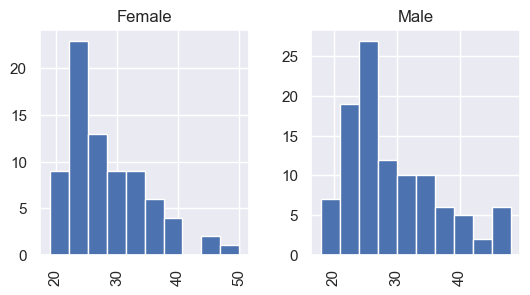

In [43]:
# From class
df.hist(by='Gender', column='Age', figsize=(6,3))
plt.show()

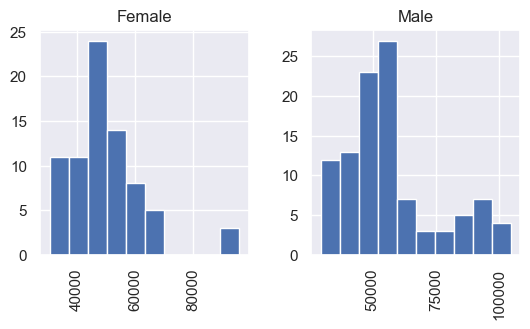

In [44]:
# From class
df.hist(by='Gender', column='Income', figsize=(6,3))
plt.show()

In [45]:
# From class
# Correlation coeficient is a normalized version of covariance.
corr = df.corr(numeric_only=True)
corr

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


In [46]:
# From class
# Covariance is in the unit measure of the variable, this can lead to confussion, 
# to avoid this, it is better to use corr.
cov = df.cov(numeric_only=True)
cov

,Age,Education,Usage,Fitness,Income,Miles
Age,48.212166,3.149410,0.113470,0.406828,5.884446e+04,13.186530
Education,3.149410,2.614867,0.693172,0.636623,1.670472e+04,25.770795
Usage,0.113470,0.693172,1.176785,0.695469,9.303043e+03,42.709808
Fitness,0.406828,0.636623,0.695469,0.919429,8.467925e+03,39.073246
Income,58844.463439,16704.717815,9303.042582,8467.925388,2.724706e+08,465265.361887
Miles,13.186530,25.770795,42.709808,39.073246,4.652654e+05,2689.833489


In [47]:
# Fill diagonal and upper half with NaNs
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr.style
     .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
     .highlight_null(color='#f1f1f1')  # Color NaNs grey
     .format(precision=4))

,Age,Education,Usage,Fitness,Income,Miles
Age,nan,nan,nan,nan,nan,nan
Education,0.2805,nan,nan,nan,nan,nan
Usage,0.0151,0.3952,nan,nan,nan,nan
Fitness,0.0611,0.4106,0.6686,nan,nan,nan
Income,0.5134,0.6258,0.5195,0.5350,nan,nan
Miles,0.0366,0.3073,0.7591,0.7857,0.5435,nan


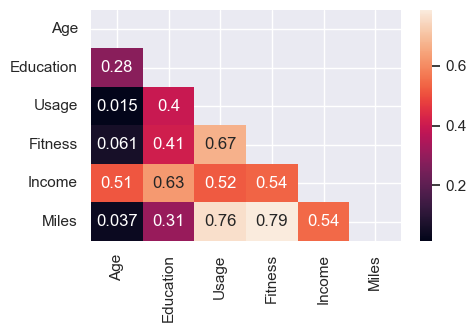

In [48]:
# From class was original withou mask
plt.figure(figsize = (5, 3))
sns.heatmap(corr, annot=True)
plt.show()

## What is the distribution of the average number of miles for each product?

In [49]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


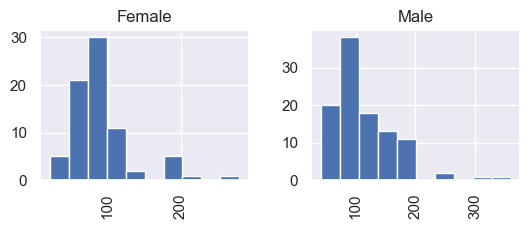

In [50]:
# From class
df.hist(by='Gender', column='Miles', figsize=(6,2))
plt.show()

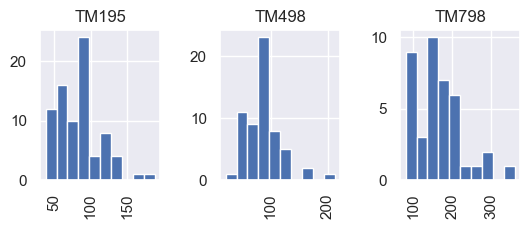

In [51]:
# From class
df.hist(by='Product', column='Miles', layout=(1,3), figsize=(6,2))
plt.subplots_adjust(wspace=0.5) 
plt.show()

In [52]:
# From class
pd.pivot_table(df, 'Miles', index=['Product', 'Gender'],
               columns=['MaritalStatus'], aggfunc='mean')

MaritalStatus    Partnered      Single
Product Gender                        
TM195   Female   74.925926   78.846154
        Male     80.190476   99.526316
TM498   Female   94.000000   80.214286
        Male     87.238095   91.100000
TM798   Female  215.000000  133.333333
        Male    176.315789  147.571429

In [53]:
df.Product.unique()

array(['TM195', 'TM498', 'TM798'], dtype=object)

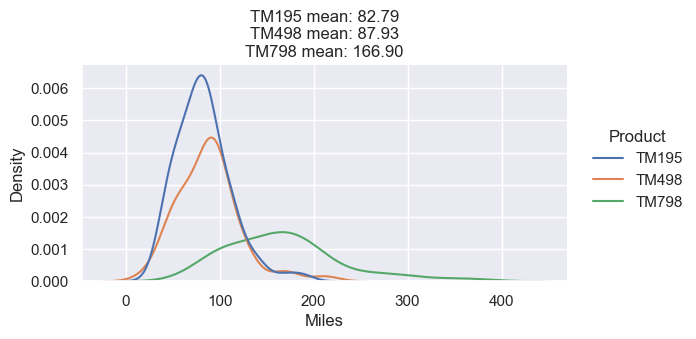

In [54]:
sns.set(font_scale=1) 
g = sns.displot(data=df, x="Miles", hue="Product", height=3, aspect=2, 
            kind="kde", facet_kws={'sharex': False, 'sharey': False})
title = []
for p in df.Product.unique():
    mean = df[df.Product==p]['Miles'].mean()
    title.append(f'{p} mean: {mean:.2f}')
plt.title('\n'.join(title))
plt.show()
sns.set()

## A simple example of a Linear Regression
(From Class)

In [55]:
# Simple Linear Regression

# Load function from sklearn
from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

y = df['Miles']
x = df[['Usage','Fitness']]

# Train the model using the training sets
regr.fit(x, y)

LinearRegression()

In [56]:
regr.coef_

array([20.21486334, 27.20649954])

In [57]:
regr.intercept_

-56.74288178464859

In [58]:
# MilesPredicted = -56.74 + 20.21*Usage + 27.20*Fitness